# EDA for NIRF Ranking Dataset

In [1]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = "./Datasets/Nirf"

overall_2016 = {}
overall = {}


for i in ['2017','2018','2019','2020','2021']:
    data_overall = pd.read_csv(directory+f"/{i}/OverallRanking_{i}.csv",encoding="unicode_escape")
    del data_overall['Institute Id']
    overall[i]=data_overall

# for k in ['Engineering','Management','Pharmacy','University']:
#   data_overall = pd.read_csv(directory+f"/2016/{k}Ranking_2016.csv",encoding="unicode_escape")
#   overall_2016[k]=data_overall


# Overall

## Notation

link for the nirf parameter definitions : <a href="https://www.nirfindia.org/Parameter">https://www.nirfindia.org/Parameter</a>

- Rank: Ranking Given by NIRF
- Score: Overall Score
- TLR: Teaching, Learning & Resources
- RPC: Research and Professional Practice 
- GO: Graduation Outcomes
- OI: Outreach and Inclusivity
- Perception: Peer and Employer Perception

More information: https://www.nirfindia.org/Docs/Ranking_Methodology_And_Metrics_2017.pdf pg9

In [3]:
indexes = set(overall['2021']['Institute Name'])

for j in overall.keys():
    k = set(overall[j]['Institute Name'])
    indexes = indexes.intersection(k)

a = list(indexes)
a.sort()
print(a)
print(len(a))


['Aligarh Muslim University', 'Amrita Vishwa Vidyapeetham', 'Anna University', 'Banaras Hindu University', 'Banasthali Vidyapith', 'Bharath Institute of Higher Education & Research', 'Bharathiar University', 'Birla Institute of Technology & Science', 'Calcutta University', 'Gauhati University', 'Homi Bhabha National Institute', 'Indian Institute of Science', 'Indian Institute of Science Education & Research Bhopal', 'Indian Institute of Science Education & Research Kolkata', 'Indian Institute of Science Education & Research Mohali', 'Indian Institute of Science Education & Research Pune', 'Indian Institute of Technology (Banaras Hindu University) Varanasi', 'Indian Institute of Technology Bhubaneswar', 'Indian Institute of Technology Bombay', 'Indian Institute of Technology Delhi', 'Indian Institute of Technology Gandhinagar', 'Indian Institute of Technology Guwahati', 'Indian Institute of Technology Hyderabad', 'Indian Institute of Technology Kanpur', 'Indian Institute of Technology K

In [4]:
data = pd.DataFrame()
for i in overall.keys():
    curr = overall[i][overall[i]['Institute Name'].isin(indexes)].assign(year=i)
    data = pd.concat([data,curr], axis=0)

In [5]:
display(data)

,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
0,Indian Institute of Science,Bengaluru,Karnataka,83.28,1,83.11,87.59,87.97,61.48,83.33,2017
1,Indian Institute of Technology Madras,Chennai,Tamil Nadu,73.97,2,69.49,72.60,84.02,76.75,68.70,2017
2,Indian Institute of Technology Bombay,Mumbai,Maharashtra,71.78,3,64.68,78.14,70.07,65.80,83.44,2017
3,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,68.43,4,55.07,70.46,85.11,72.85,64.72,2017
4,Indian Institute of Technology Delhi,New Delhi,Delhi,64.18,5,55.45,68.48,65.92,68.69,69.53,2017
...,...,...,...,...,...,...,...,...,...,...,...
85,PSG College of Technology,Coimbatore,Tamil Nadu,43.14,86,55.37,18.13,58.69,50.17,43.26,2021
86,Pondicherry University,Puducherry,Pondicherry,43.10,87,39.94,30.10,72.40,58.18,17.89,2021
89,North Eastern Hill University,Shillong,Meghalaya,42.79,90,55.53,16.31,74.61,51.63,11.62,2021
91,Sri Venkateswara University,Tirupati,Andhra Pradesh,42.78,92,51.21,19.87,79.19,50.61,5.57,2021


# Statistics for Overall

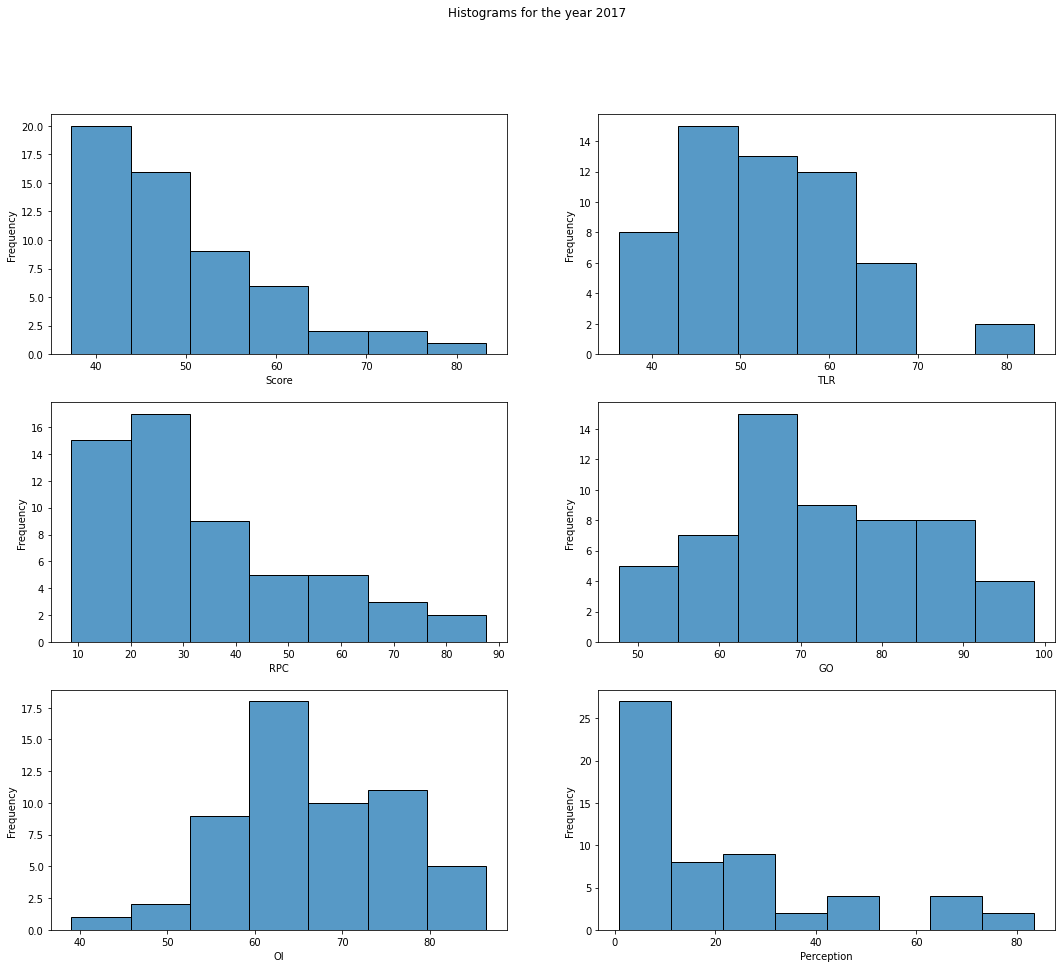

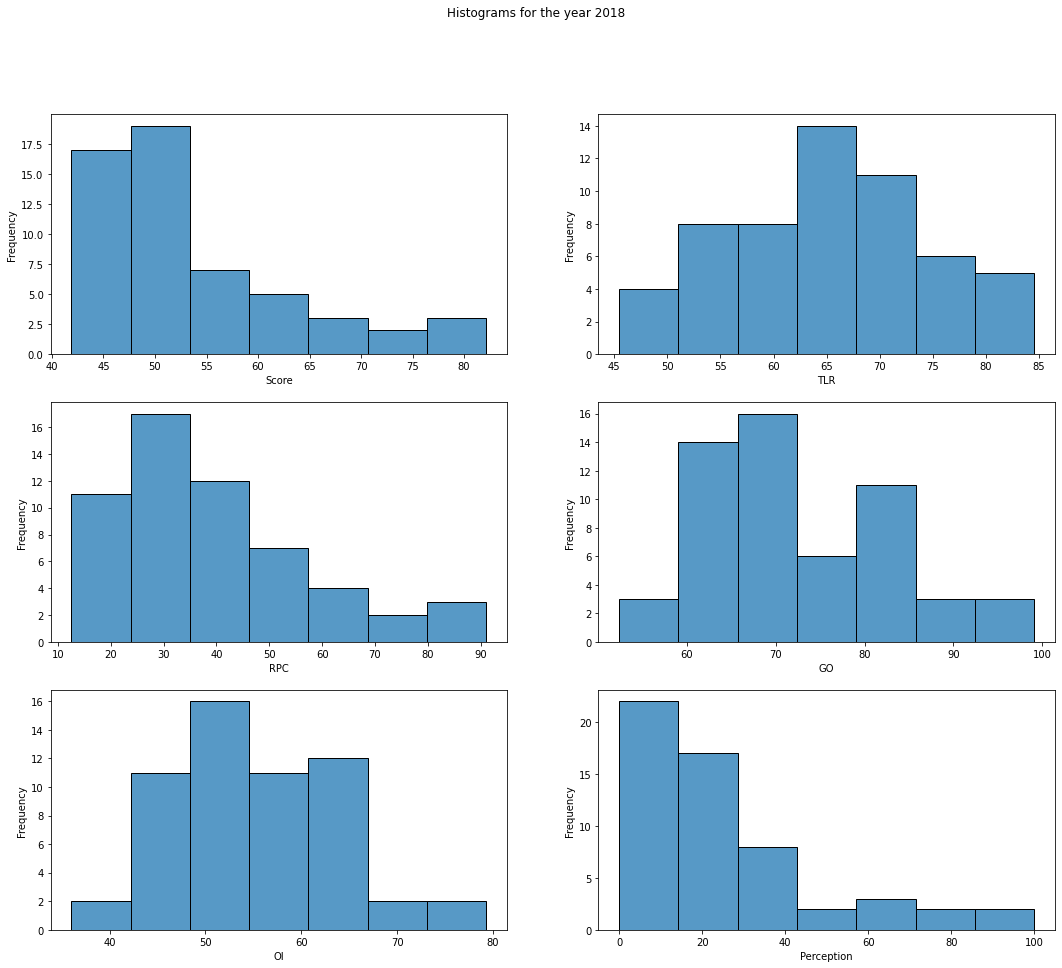

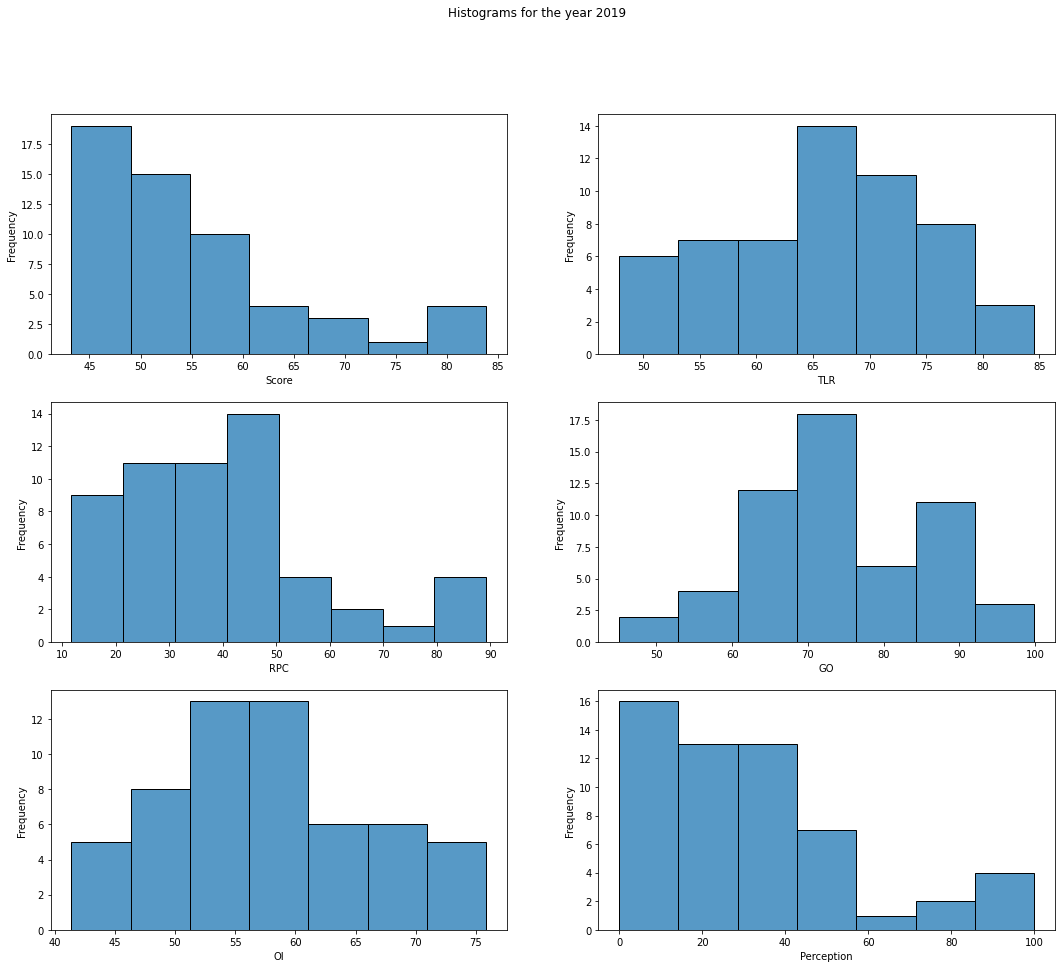

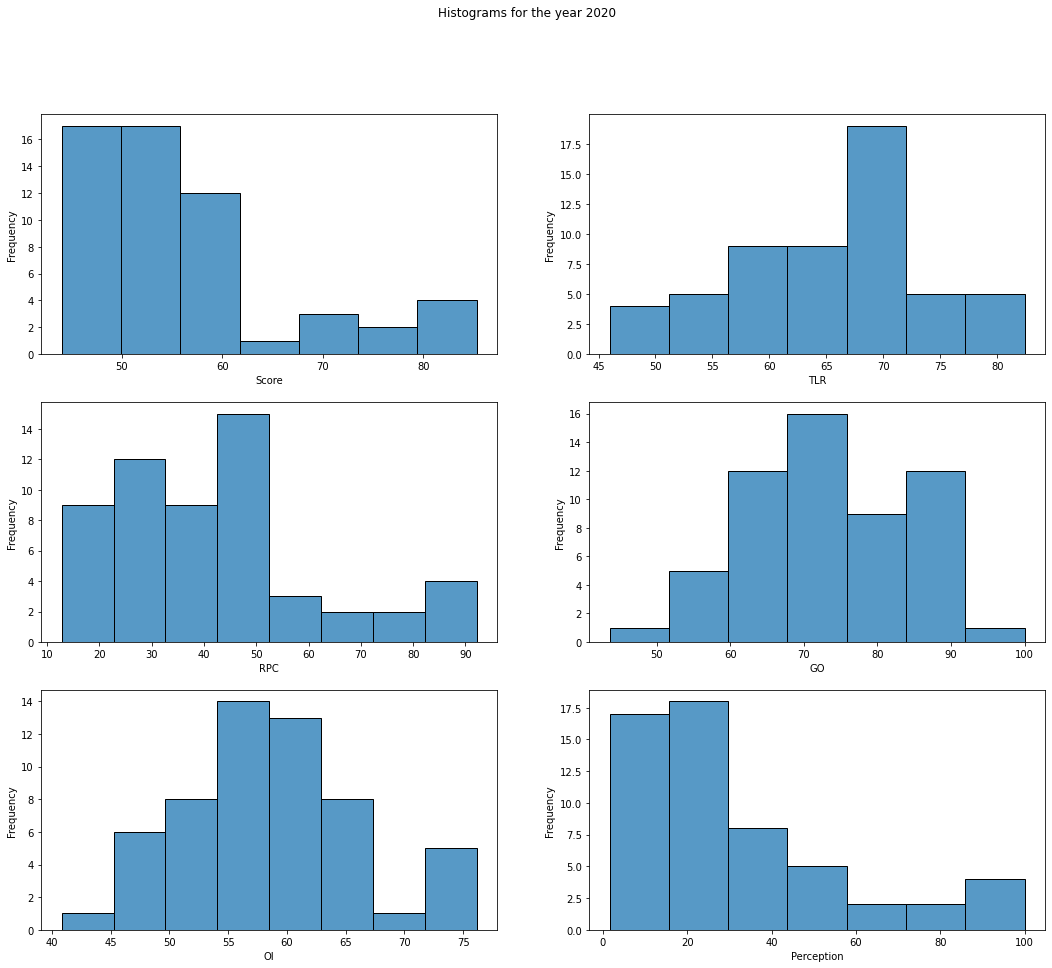

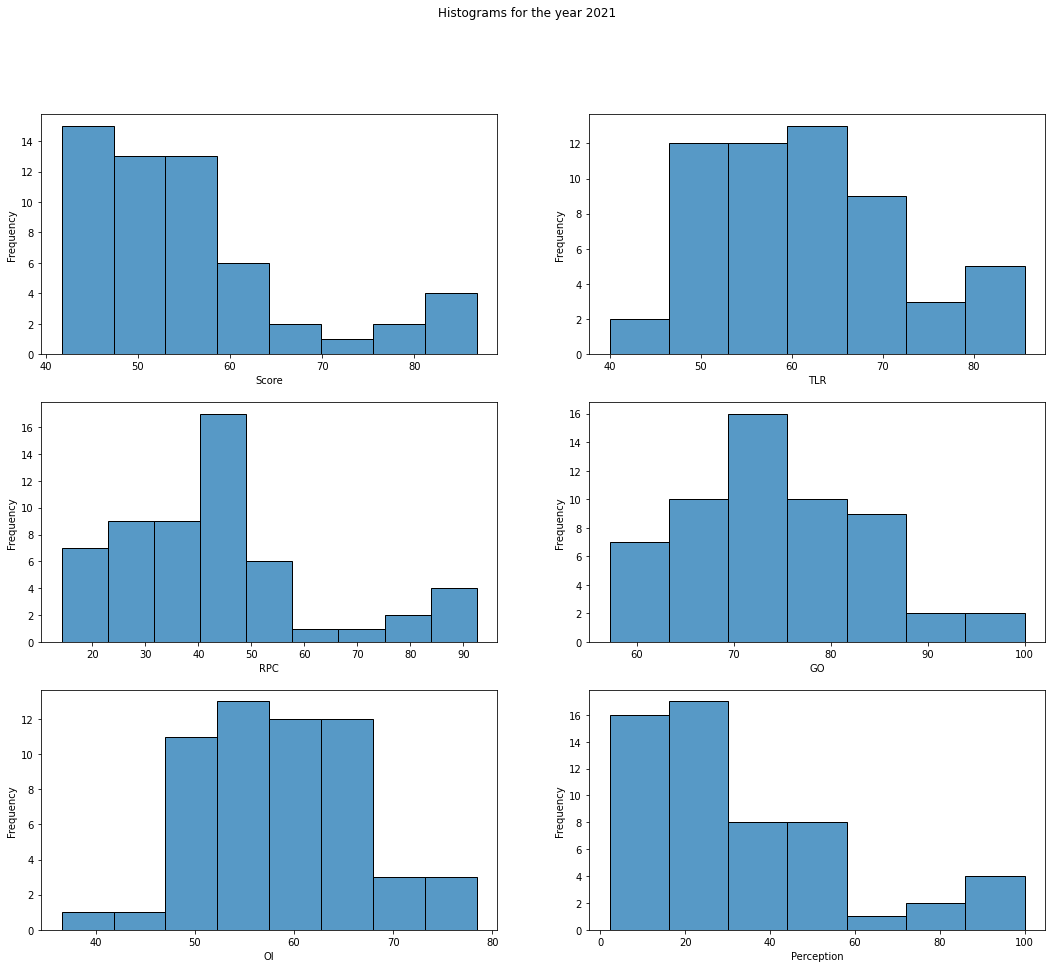

In [6]:
plt.rcParams['figure.figsize'] = [18,15]
for i,j in data.groupby('year'):
  cols=['Score','Rank','TLR','RPC','GO','OI','Perception']
  stat_data = j[cols]
  cols =['Score','TLR','RPC','GO','OI','Perception']
  plt.figure()
  plt.suptitle(f"Histograms for the year {i}")
  for k in range(len(cols)):
    plt.subplot(3,2,k+1)
    sns.histplot(stat_data[cols[k]], bins='auto')
    plt.xlabel(f"{cols[k]}")
    plt.ylabel(f"Frequency")
  plt.show()

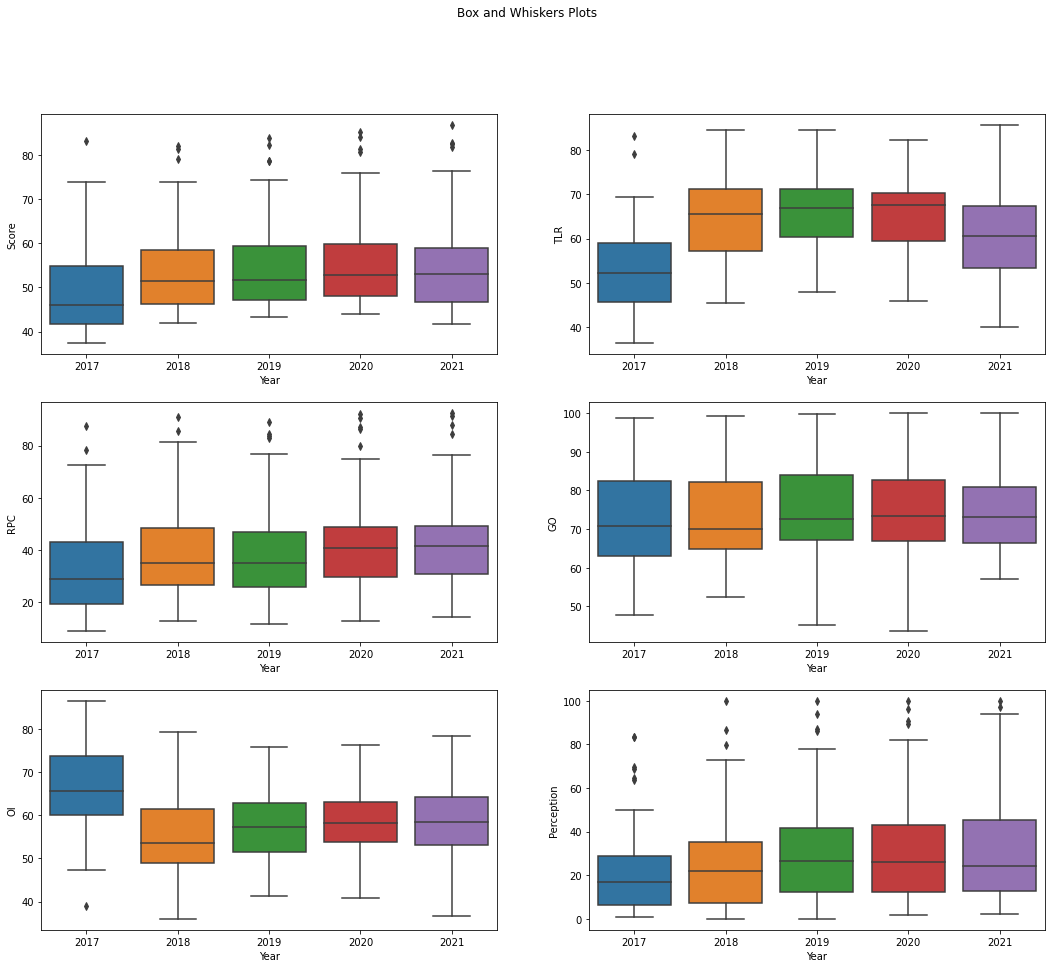

In [7]:
plt.rcParams['figure.figsize'] = [18,15]

cols = ['Score','TLR','RPC','GO','OI','Perception']
plt.figure()
plt.suptitle("Box and Whiskers Plots")
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x="year",y=cols[i],data=data)
    plt.xlabel("Year")
    plt.ylabel(cols[i])
plt.show()

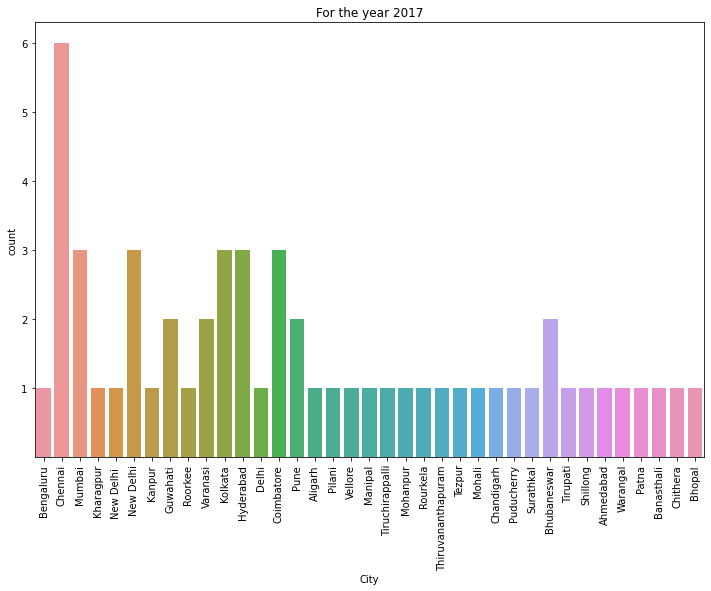

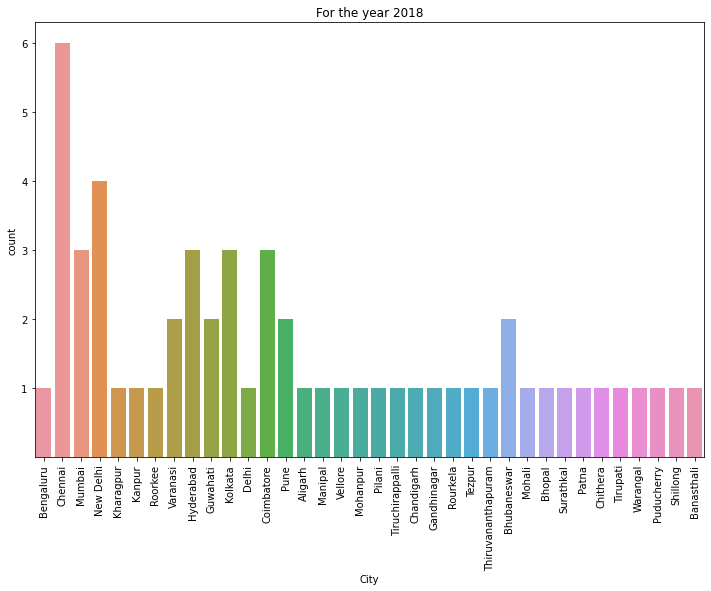

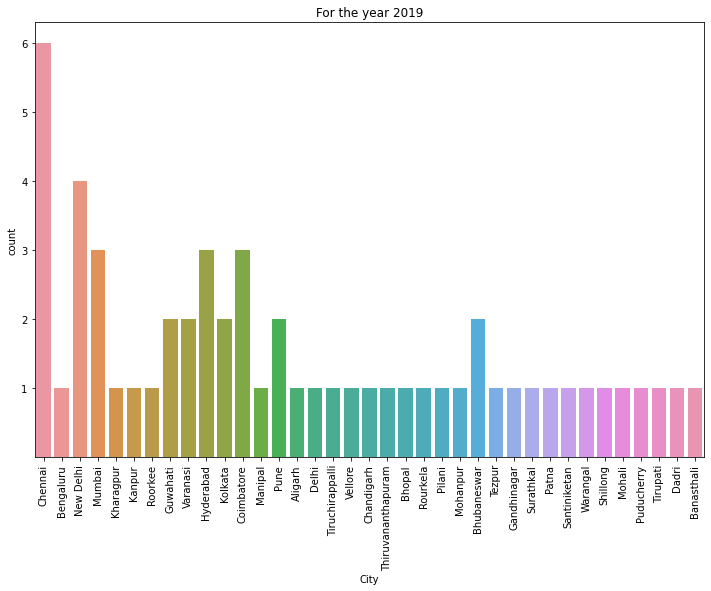

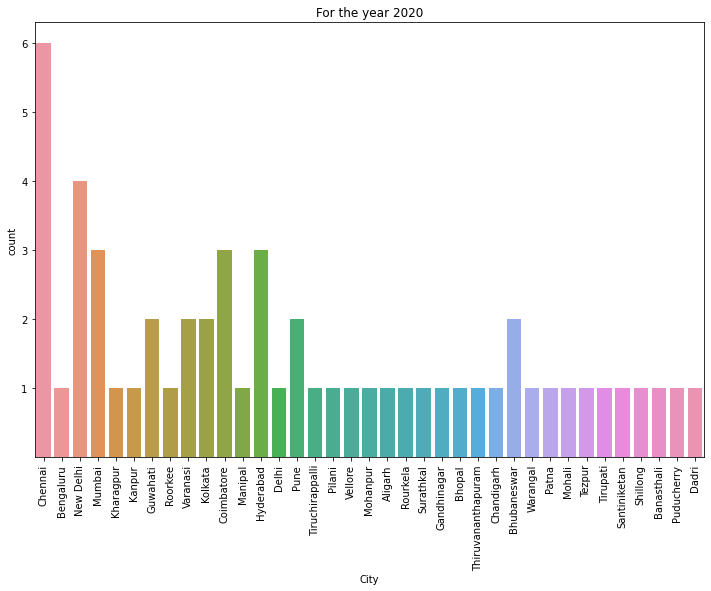

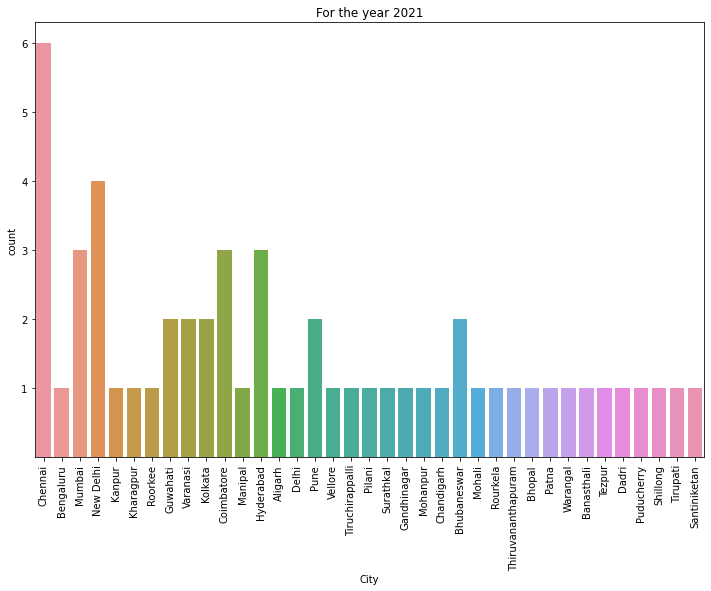

In [8]:
plt.rcParams['figure.figsize'] = [12,8]
for i,j in data.groupby('year'):
    val = j
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,10))
    plt.xlabel("City")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['City'])
    plt.show()

# Majority are in Cities/Metropolitan areas and not in towns and villages

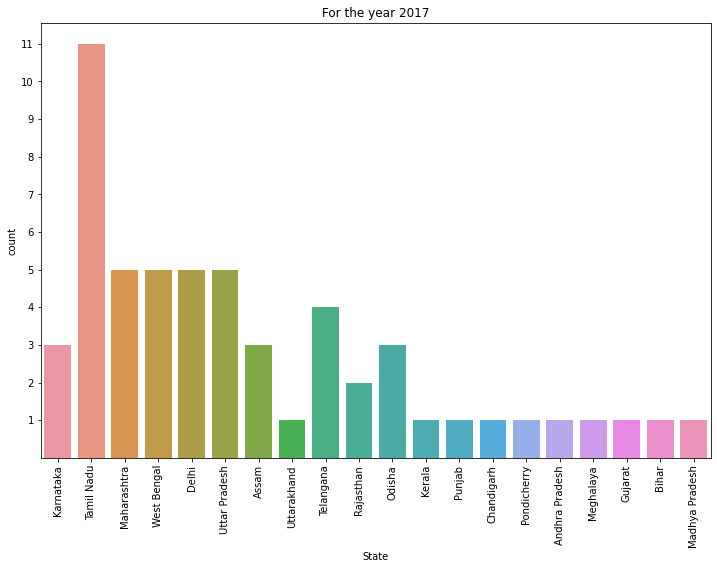

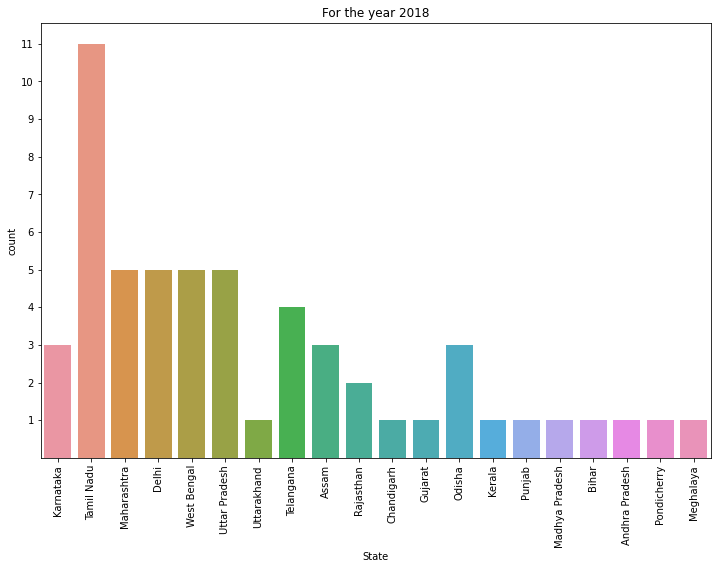

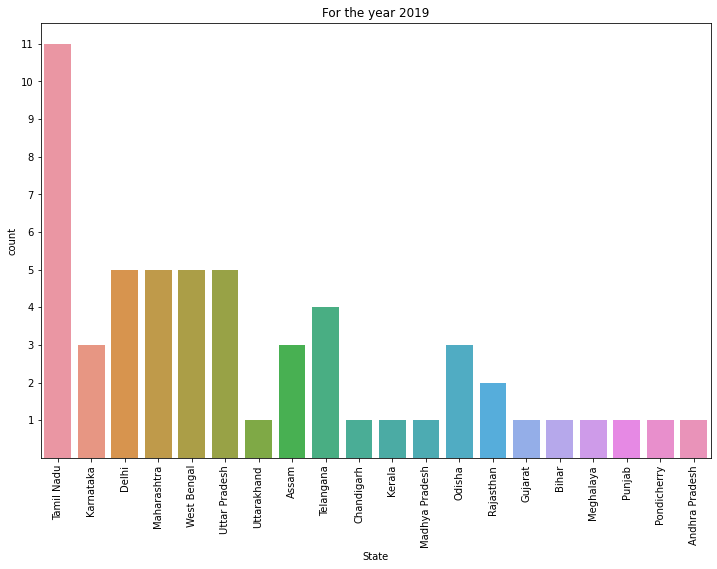

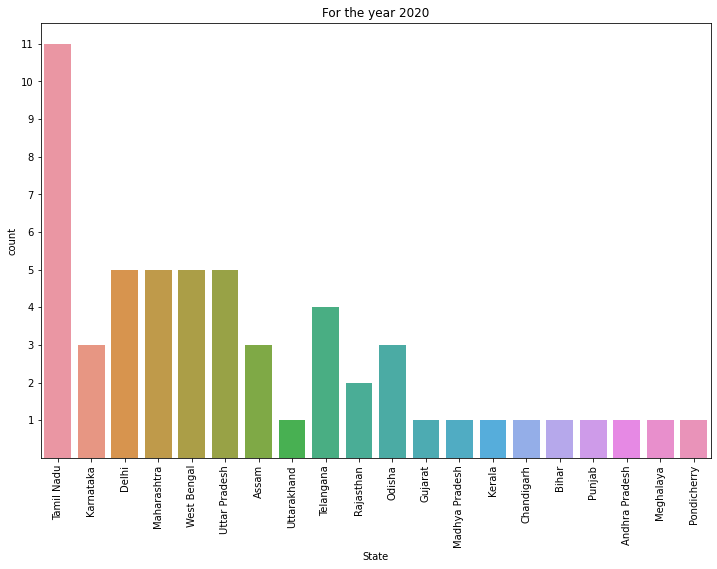

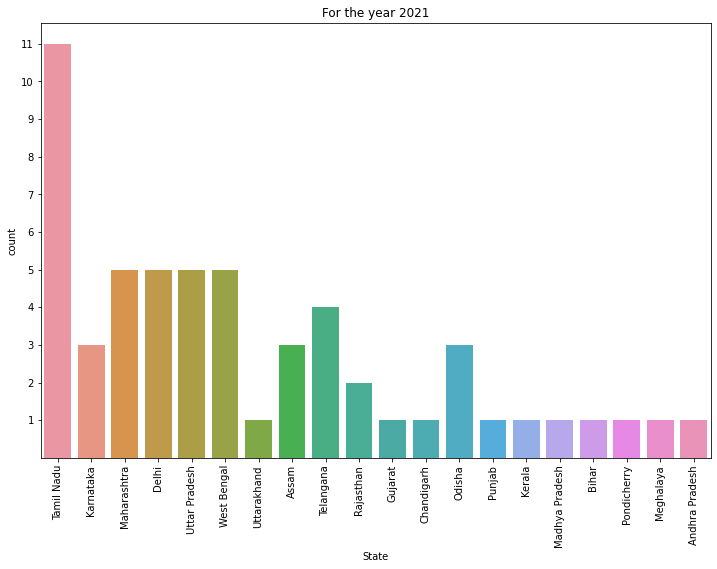

In [9]:
for i,j in data.groupby('year'):
    val = j
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,36))
    plt.xlabel("States")
    plt.ylabel("No of colleges in top 100")
    sns.countplot(val['State'])
    plt.show()

# Mean plots for batches of 10

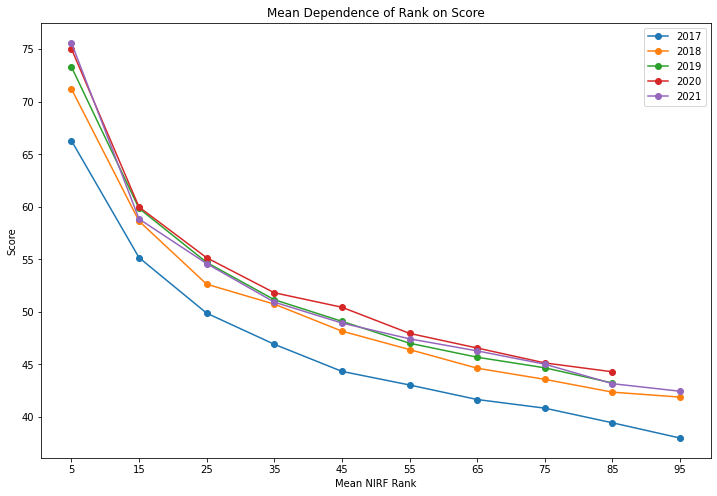

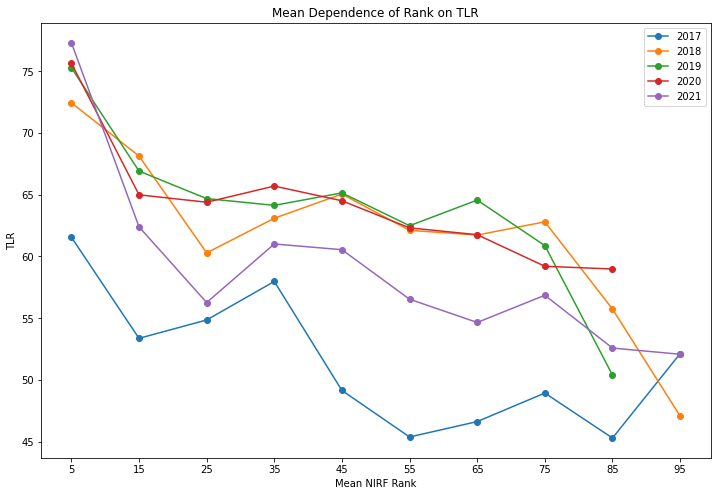

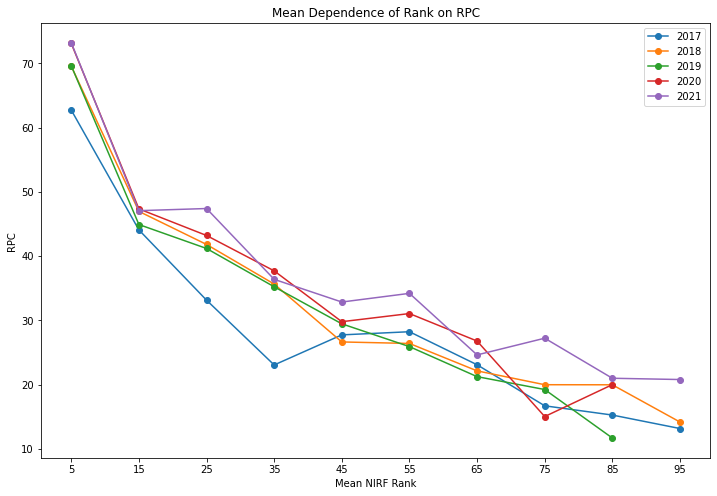

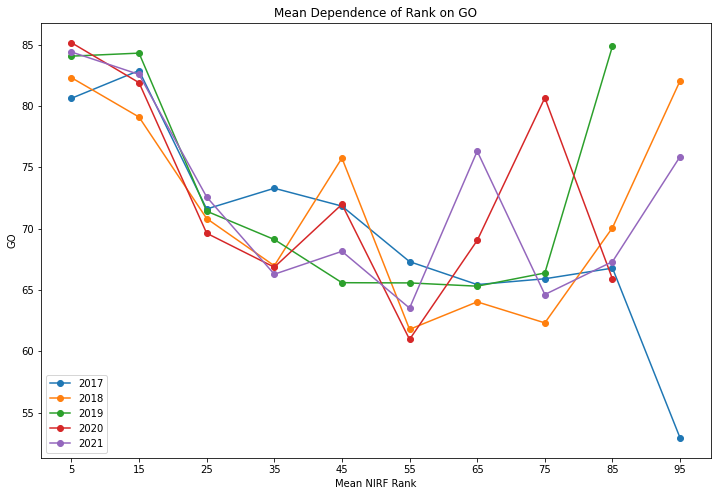

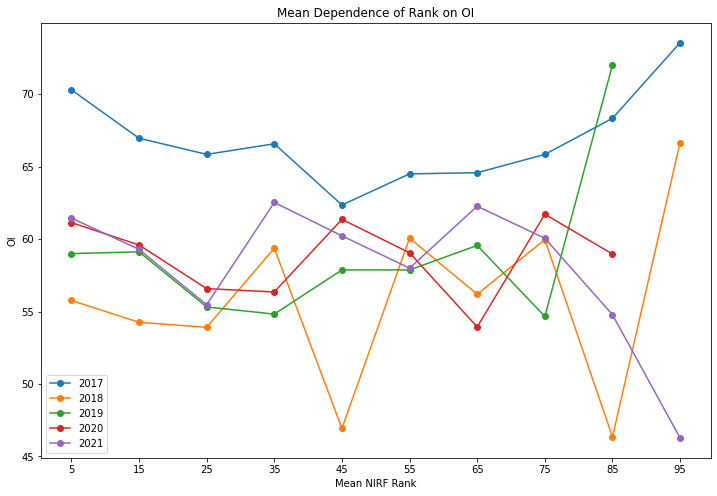

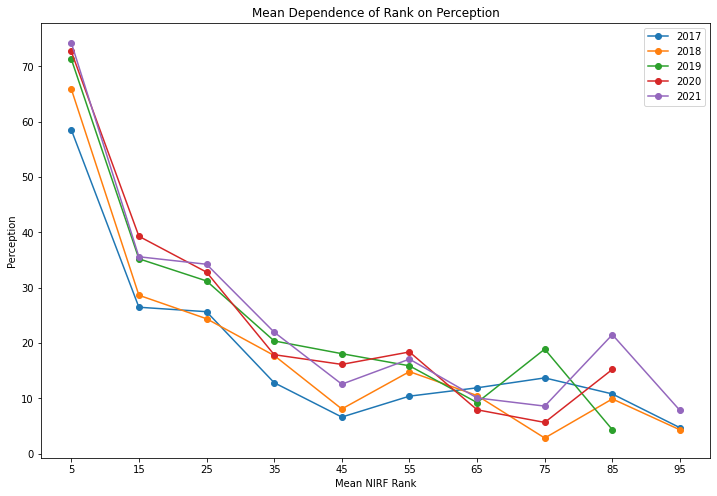

In [10]:
k=['Score','TLR','RPC','GO','OI','Perception']
for x in k:
    for i,j in data.groupby('year'):
        ranks = list(range(0,101,10))
        y_data = []
        x_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
            x_data += [rank+5]
        plt.plot(x_data,y_data,'o-',label=f"{i}")
    plt.title(f"Mean Dependence of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("Mean NIRF Rank")
    plt.xticks(range(5,101,10))
    plt.legend()
    plt.show()

# Comparison Across same Year

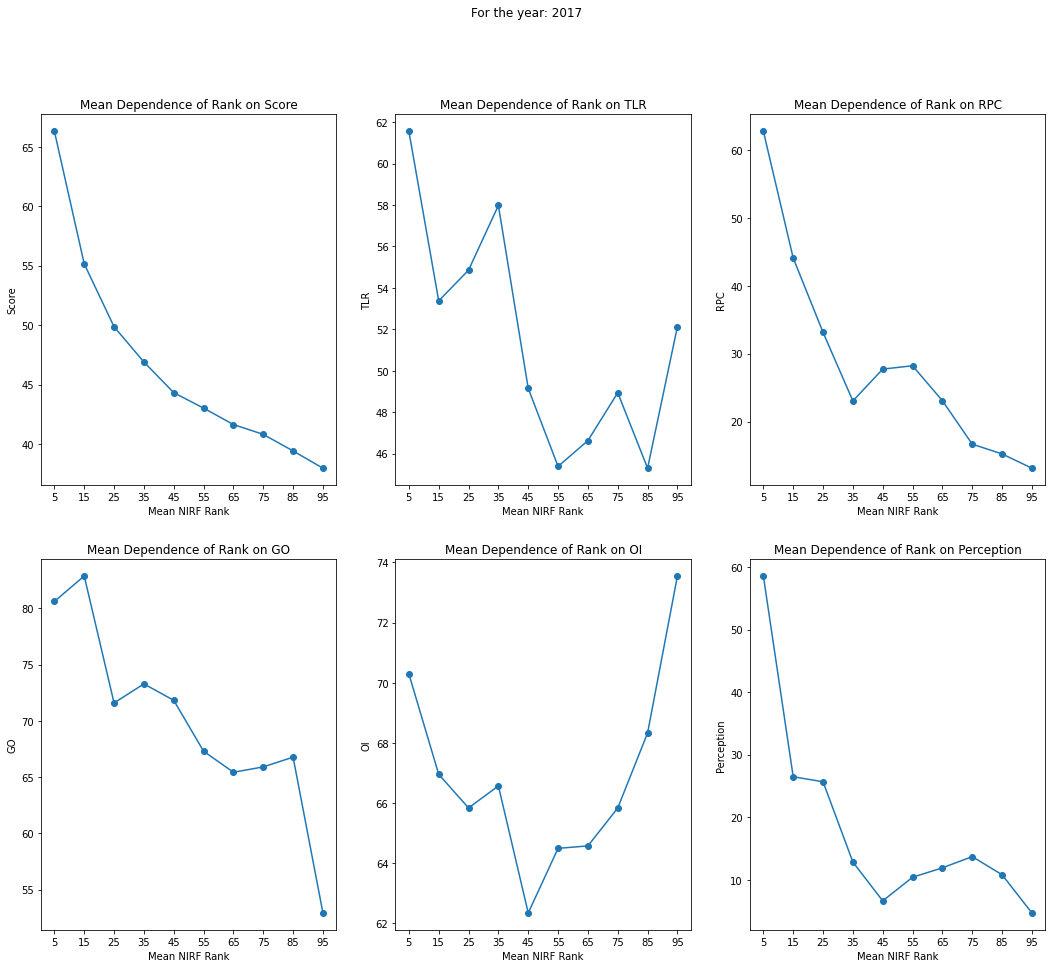

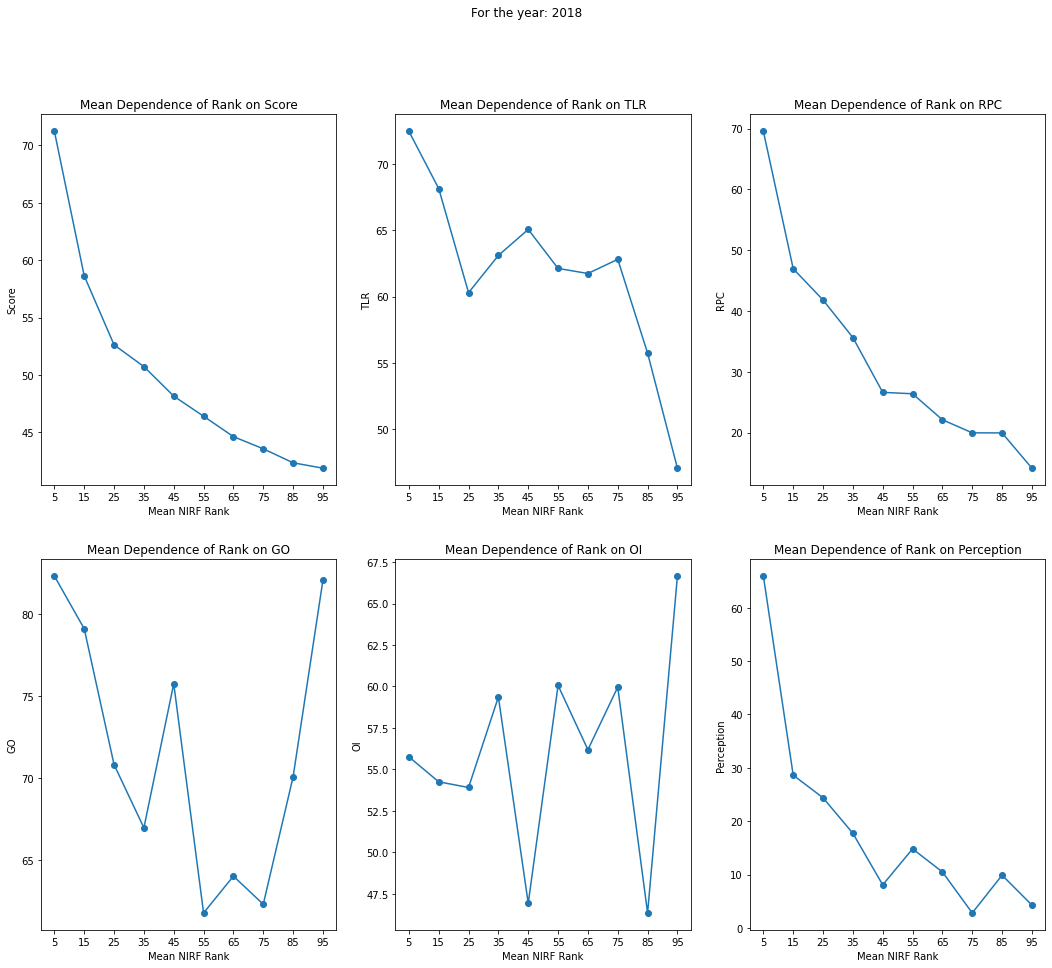

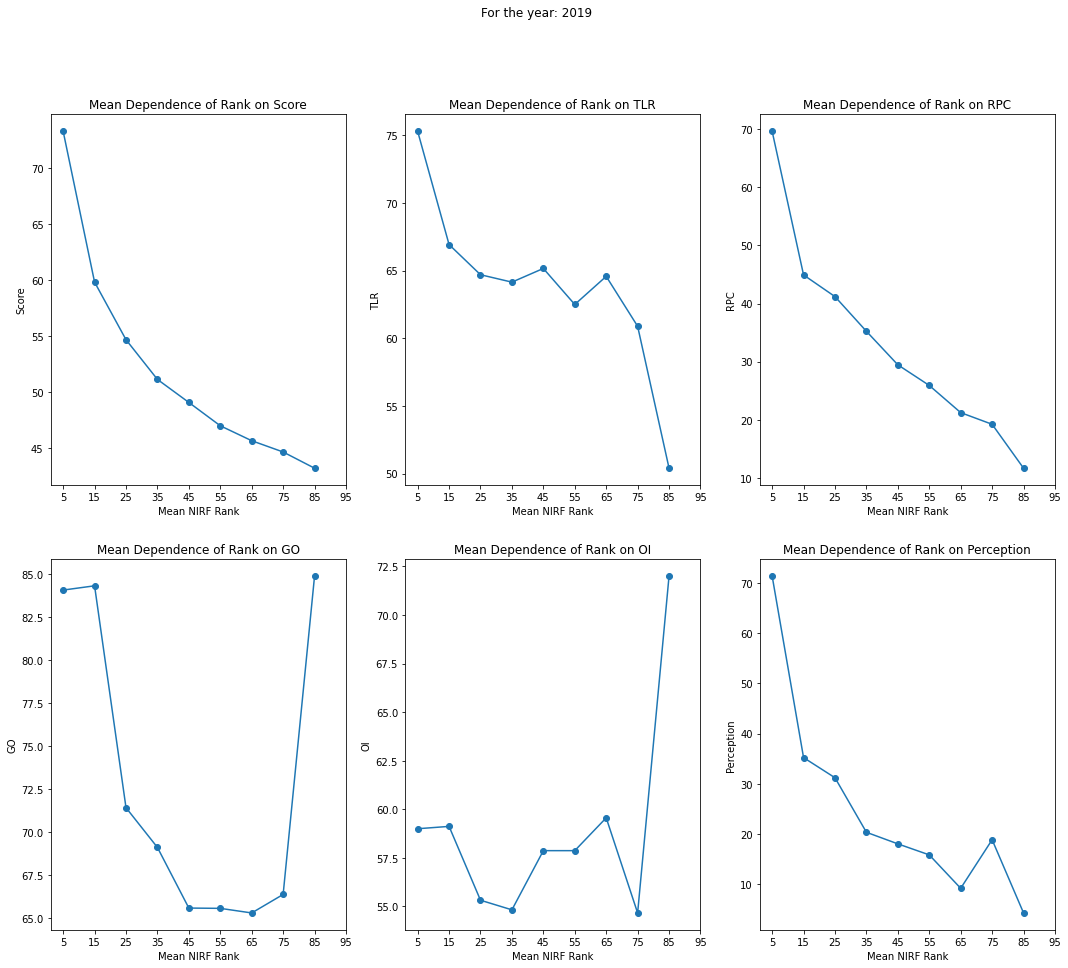

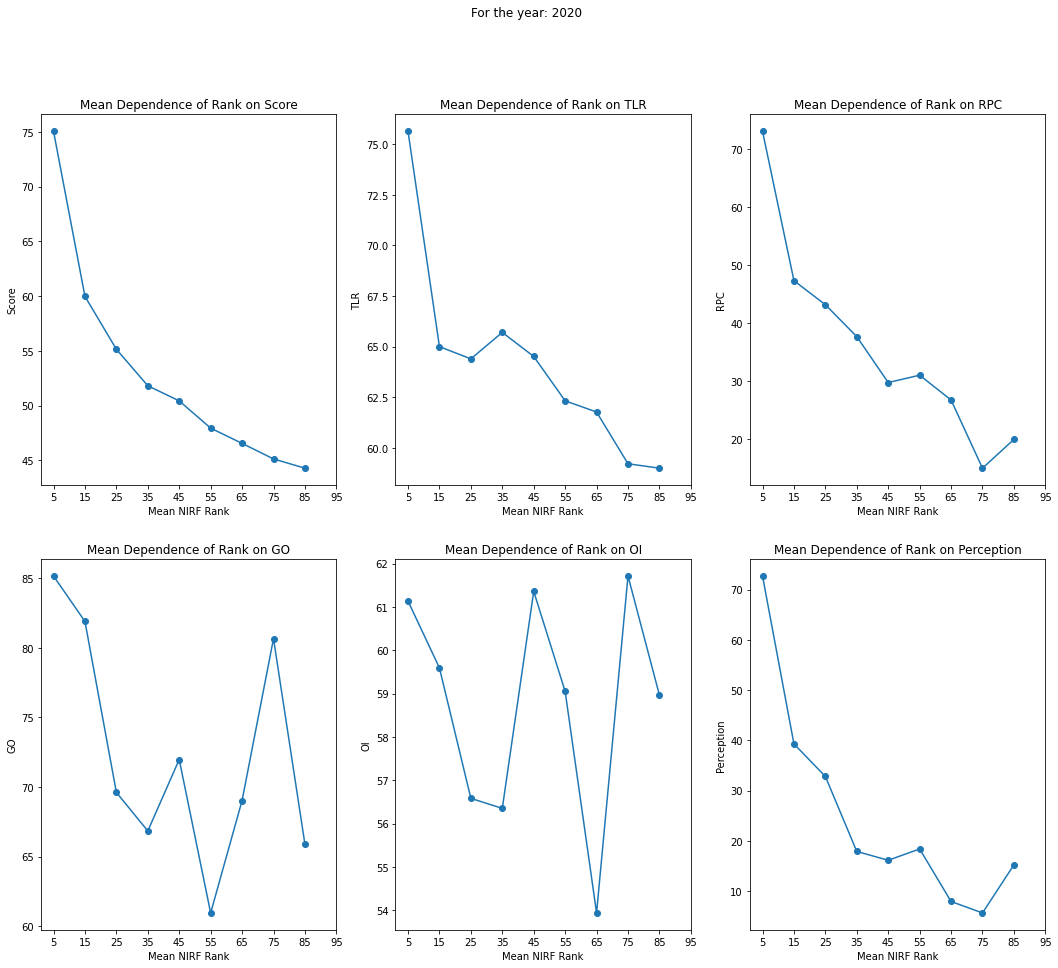

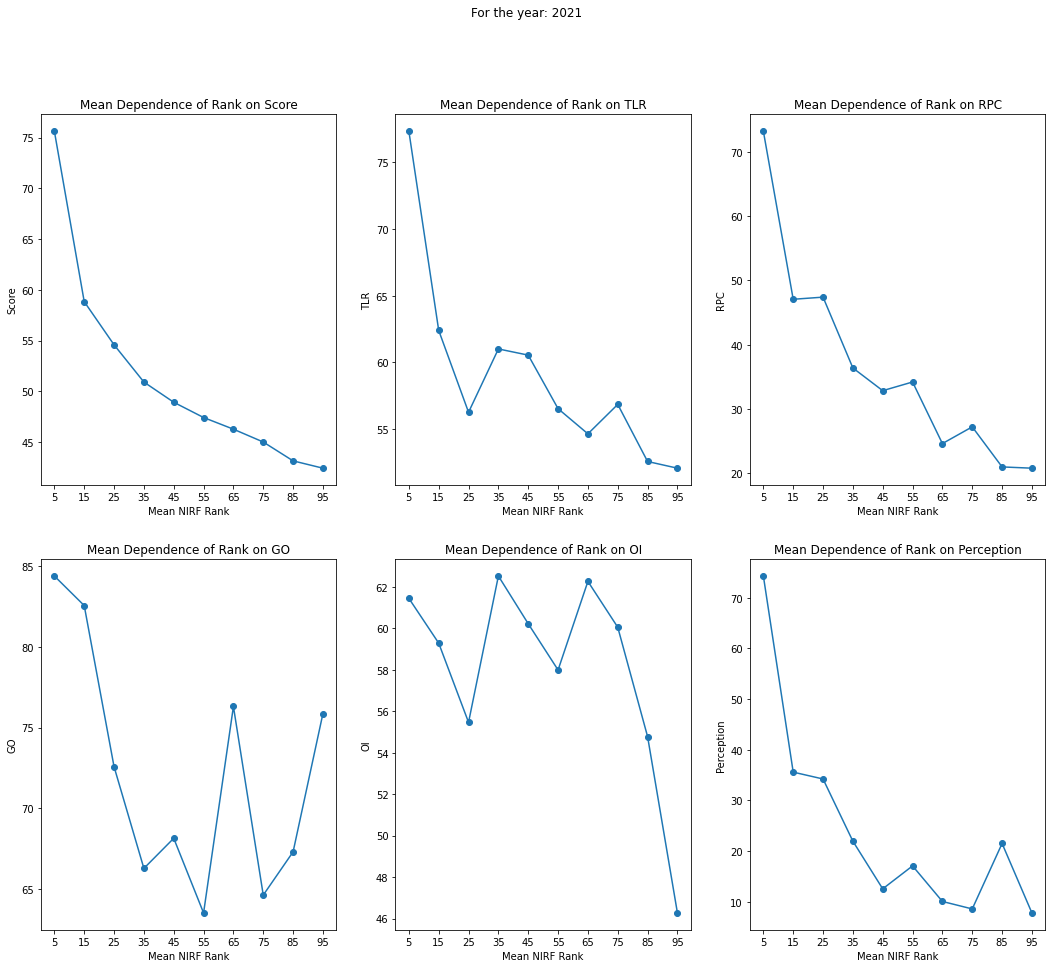

In [11]:
plt.rcParams['figure.figsize'] = [18,15]
k=['Score','TLR','RPC','GO','OI','Perception']
for i,j in data.groupby('year'):
    plt.figure()
    plt.suptitle(f"For the year: {i}")
    ranks = list(range(0,101,10))
    count = 1
    for x in k:
        y_data = []
        x_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
            x_data += [rank+5]
        plt.subplot(2,3,count)
        plt.plot(x_data,y_data,'o-')
        plt.title(f"Mean Dependence of Rank on {x}")
        plt.ylabel(f"{x}")
        plt.xlabel("Mean NIRF Rank")
        plt.xticks(range(5,101,10))
        count += 1
    plt.show()

# Mean across all years


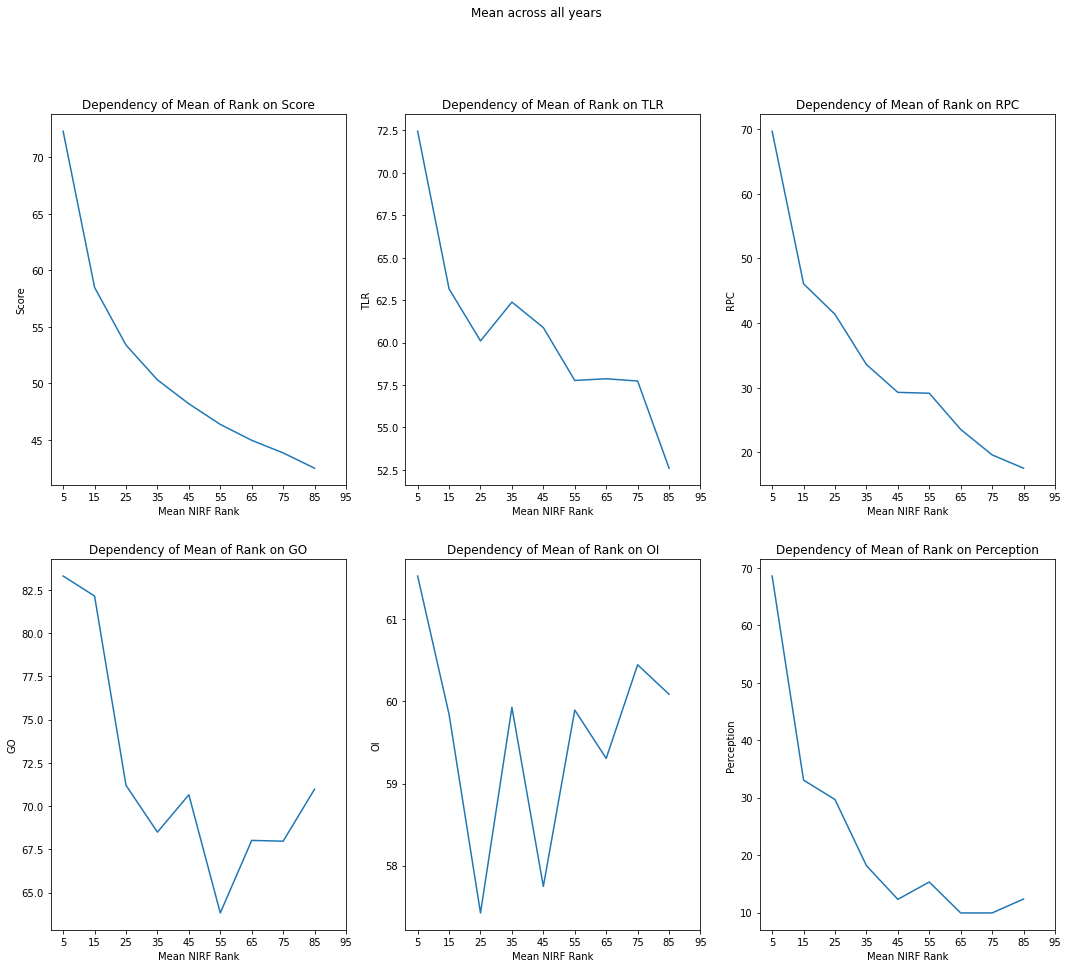

In [12]:
k=['Score','TLR','RPC','GO','OI','Perception']
plt.figure()
plt.suptitle("Mean across all years")
count=1
for x in k:
    x_data = range(5,106,10)
    Y = []
    for i,j in data.groupby('year'):
        ranks = list(range(0,101,10))
        y_data = []
        for rank in ranks:
            y_data += [np.mean(np.array(j.query(f"Rank>={rank} and Rank<={rank+10}")[x]))]
        Y += [y_data]
    Y = np.array(Y)
    y = np.mean(Y,axis=0)
    plt.subplot(2,3,count)
    plt.plot(x_data,y)
    plt.title(f"Dependency of Mean of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("Mean NIRF Rank")
    plt.xticks(range(5,101,10))
    count+=1
plt.show()

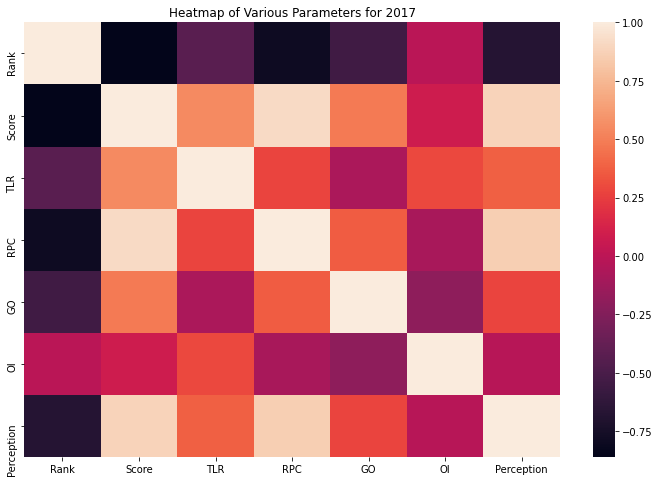

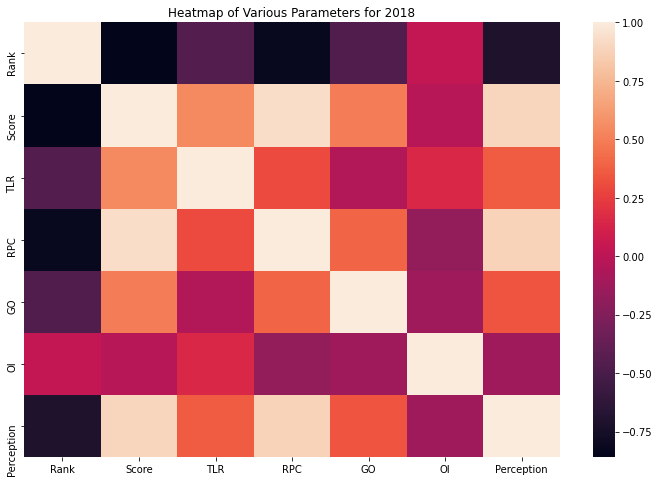

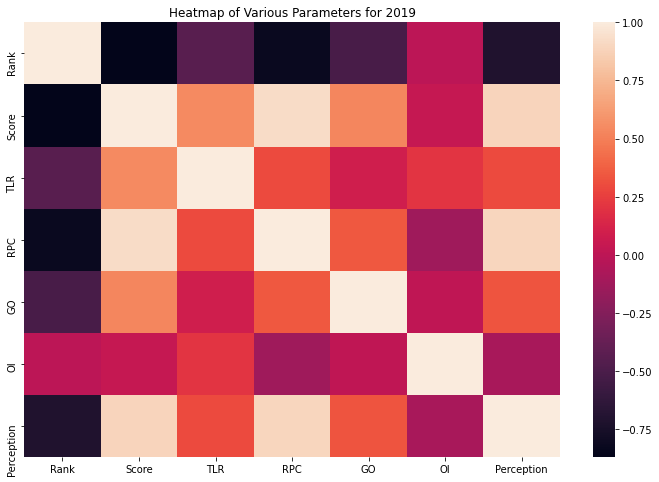

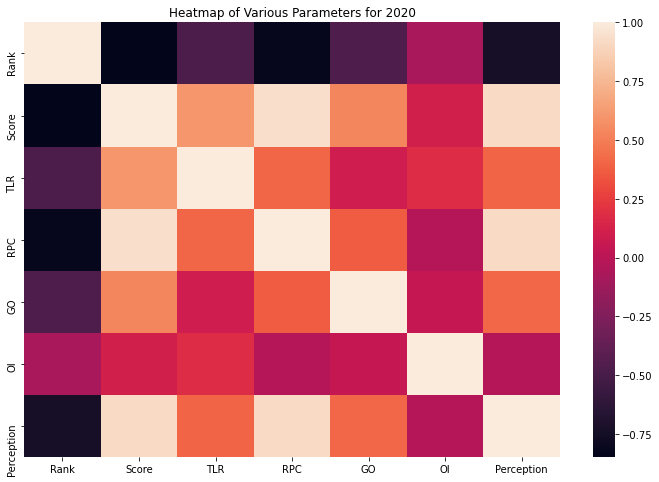

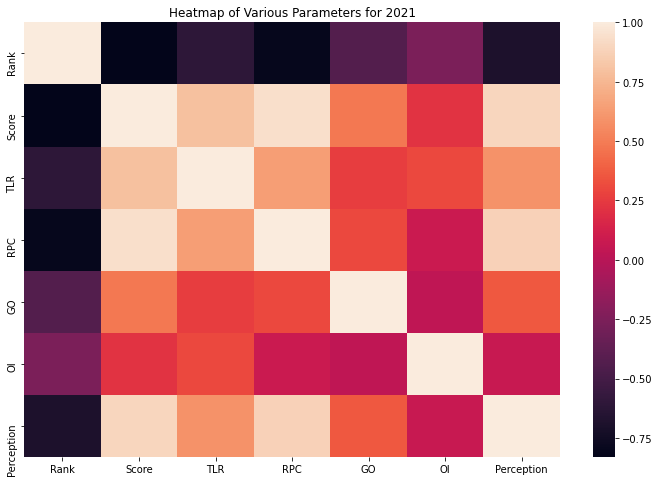

In [13]:
plt.rcParams['figure.figsize'] = [12,8]
k=['Rank','Score','TLR','RPC','GO','OI','Perception']
for i,j in data.groupby('year'):
    plt.title(f"Heatmap of Various Parameters for {i}")
    sns.heatmap(j[k].corr())
    plt.show()

# Trends only for top 10 overall over the years

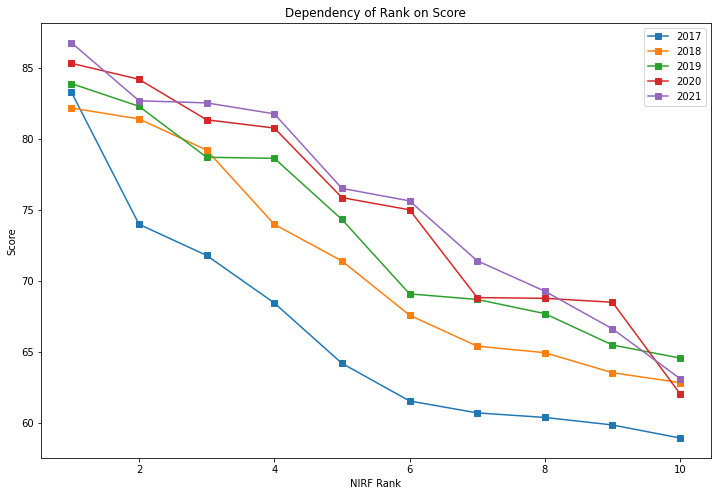

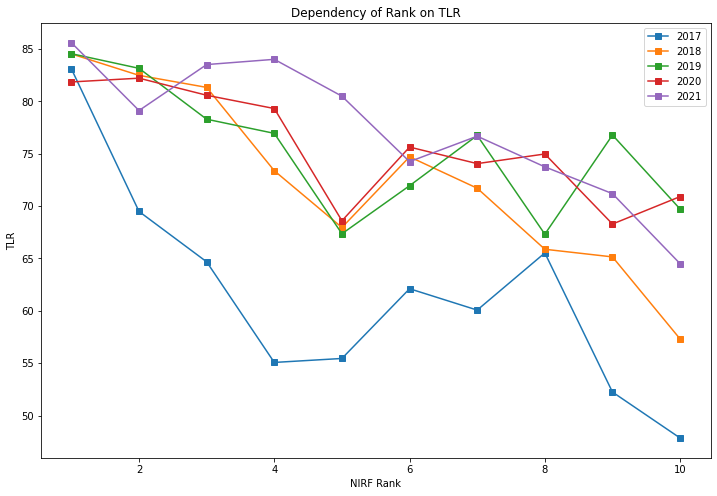

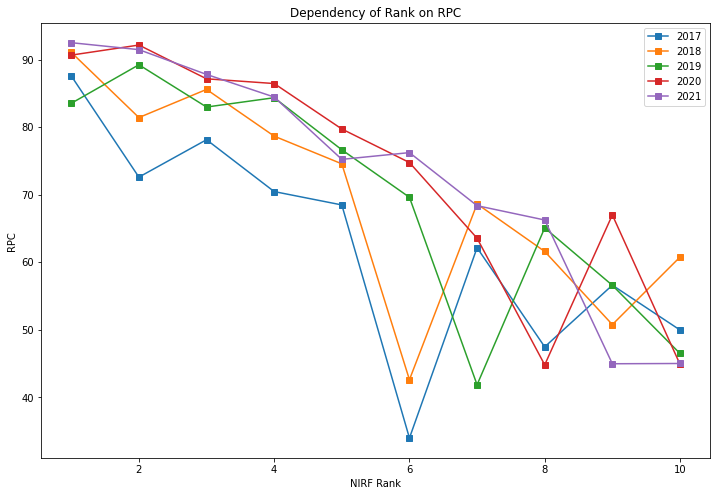

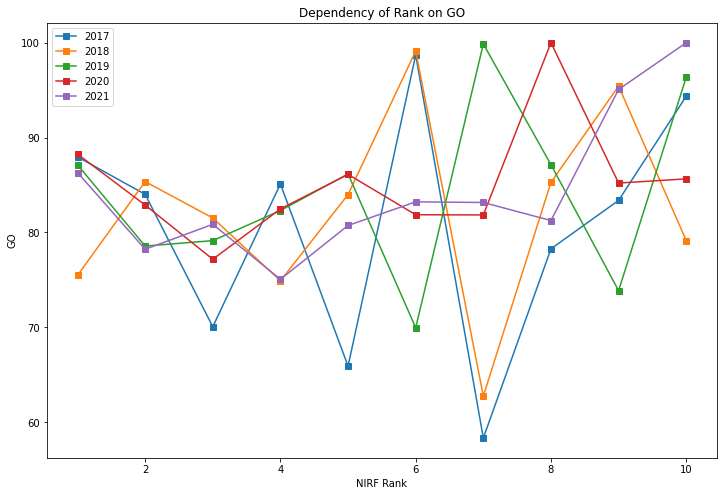

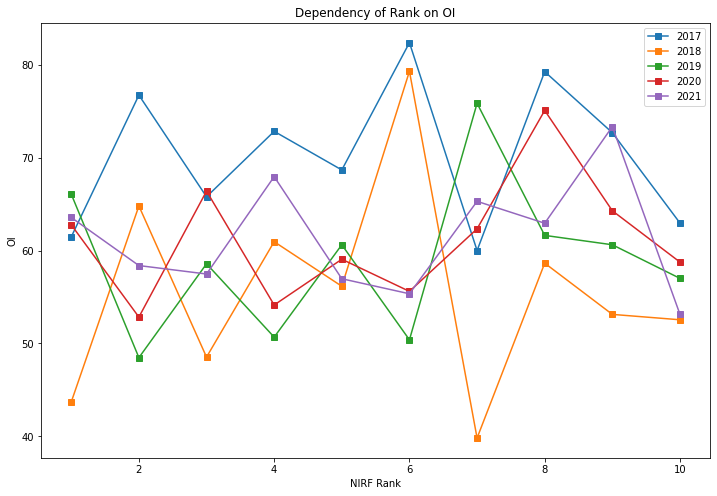

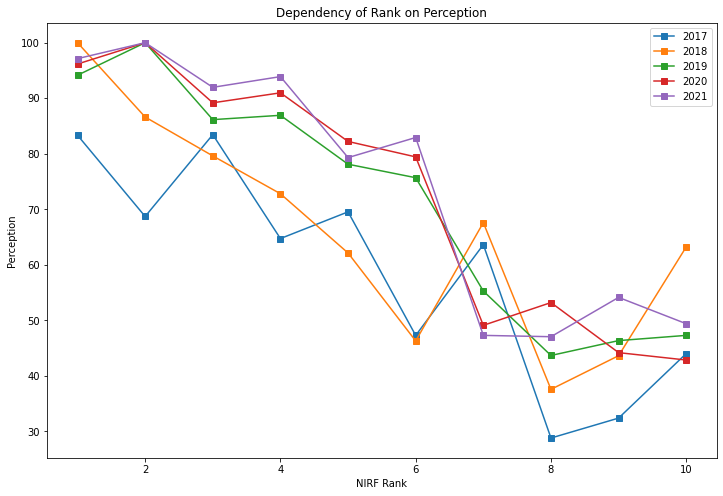

In [14]:
top10data = data.query("Rank <= 10")
k=['Score','TLR','RPC','GO','OI','Perception']
for x in k:
    for i,j in top10data.groupby('year'):
        plt.plot(j['Rank'],j[f"{x}"],'s-',label=f"{i}")
    plt.title(f"Dependency of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("NIRF Rank")
    plt.legend()
    plt.show()

# Yearly trends for top 10 overall in NIRF 2021

In [15]:
top102021 = list(overall['2021'].head(10)['Institute Name'])

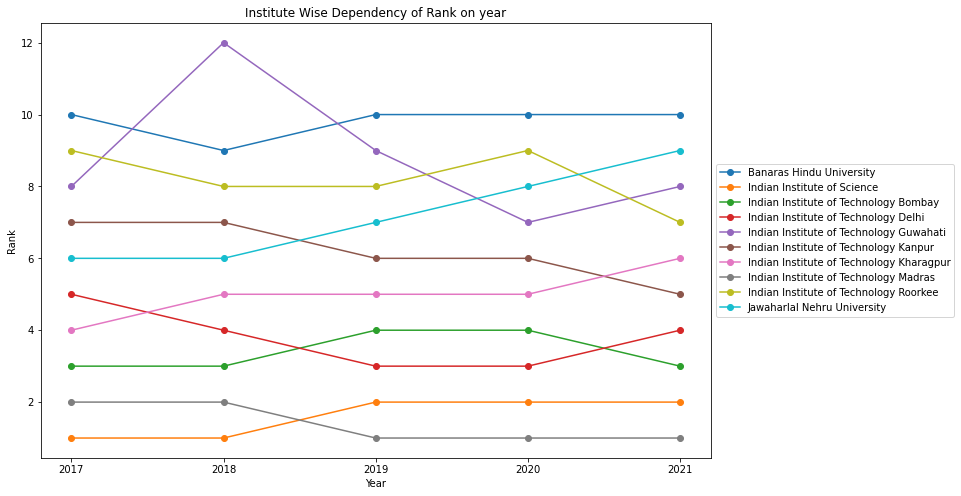

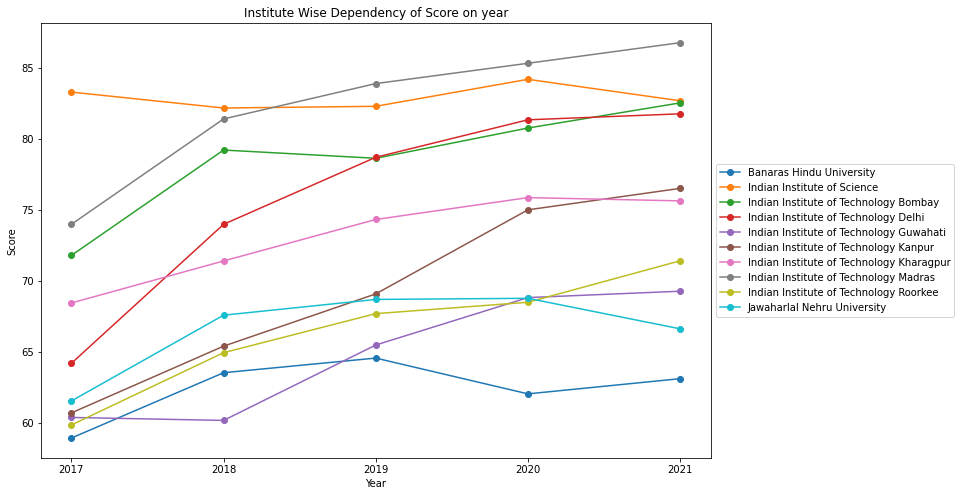

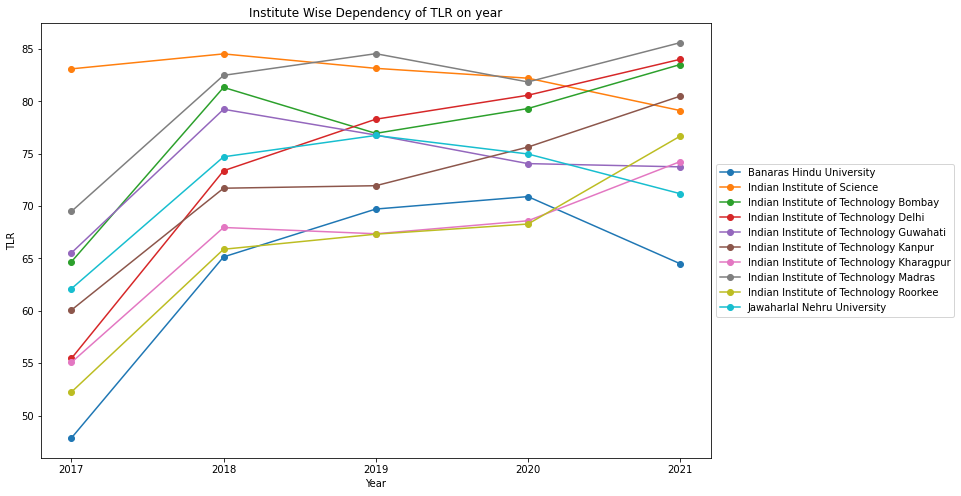

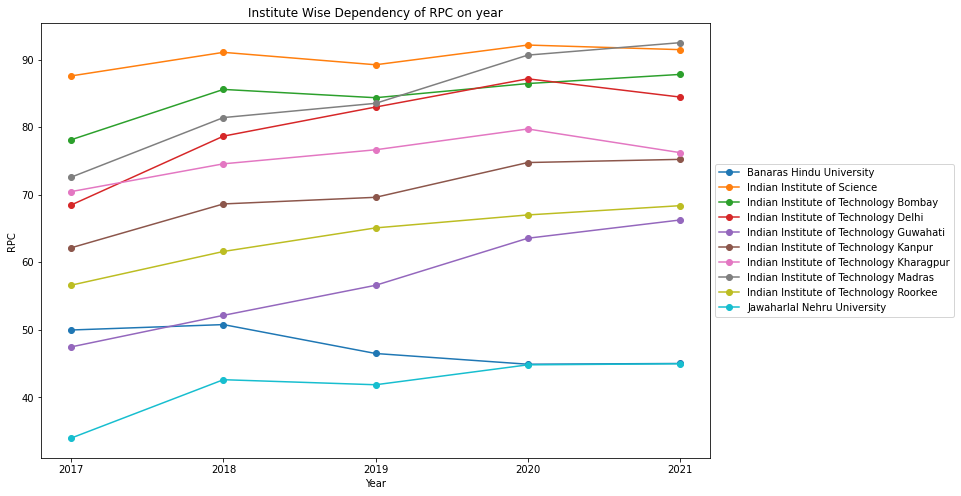

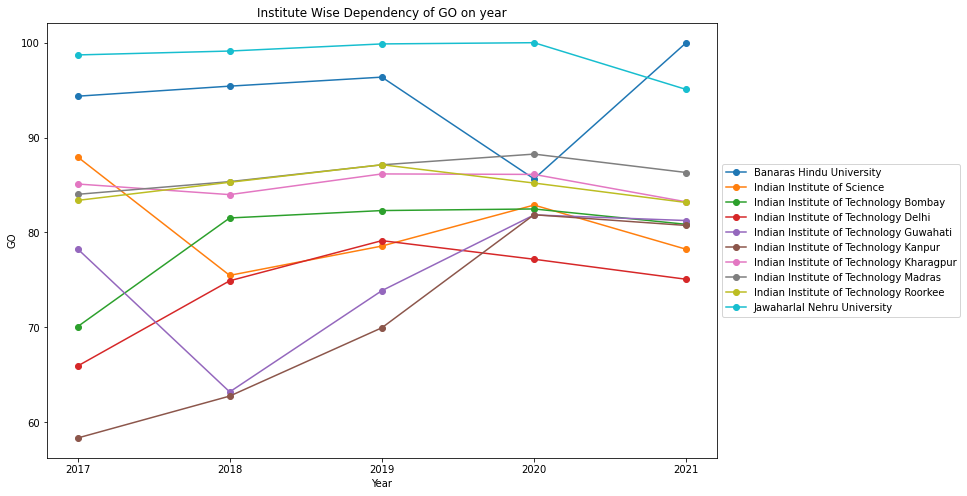

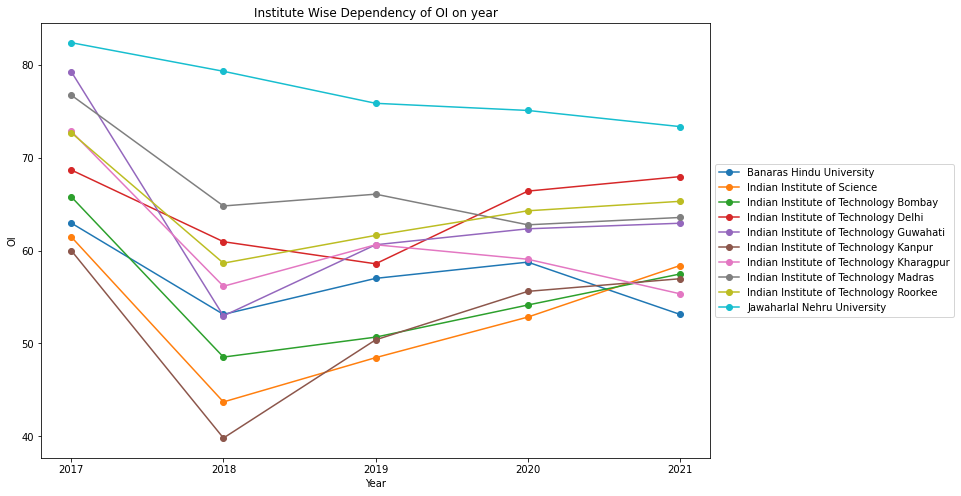

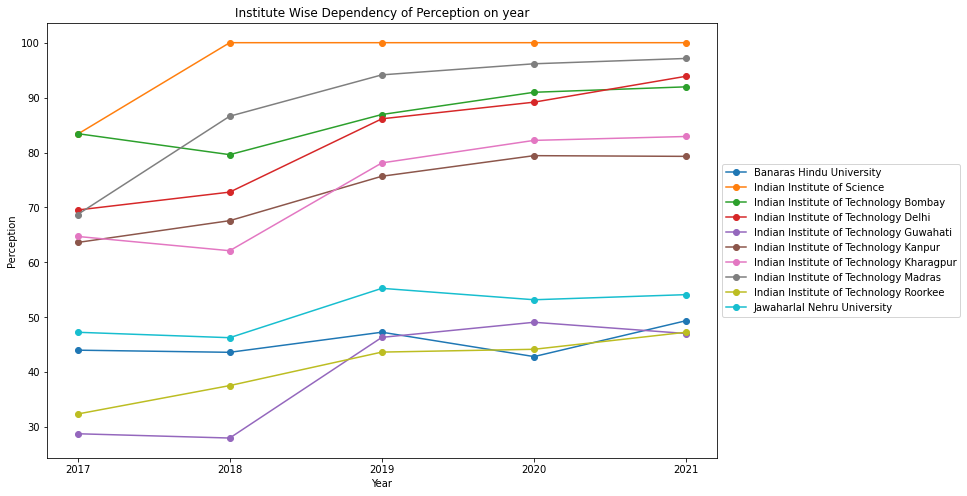

In [16]:
h=['Rank','Score','TLR','RPC','GO','OI','Perception']

for val in h:
    for i,j in data.groupby('Institute Name'):
        if(i in top102021):
            plt.plot(j['year'],j[f'{val}'],'o-',label=f"{i}")
    plt.title(f"Institute Wise Dependency of {val} on year")
    plt.ylabel(f"{val}")
    plt.xlabel("Year")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()



In [17]:
data_test=data[data['year']=='2021']

data_train=data[data['year']!='2021']

test=[]
train=[]
for i in a:
    test.append(data_test[data_test['Institute Name']==i])
    train.append(data_train[data_train['Institute Name']==i])

In [18]:
def prediction(Model,test_new=False,show_df=False):
    models=[]
    for i in train:
        if Model==RandomForestRegressor:
            model=Model(random_state=135)
        else:
            model=Model()
        
        if test_new:
            i['temp']=[1,1,1,1,1]
        else:
            i['temp']=[1,1,1,1]
            
        model.fit(np.array(i[['year','temp']]),np.array(i['Score']))
        #print(np.array(i[['year','Score']]))
        models.append(model)
    j=0
    if test_new:
        prediction=pd.DataFrame()
        for i in a:
            pred=models[j].predict([[2022,1]])
            prediction=prediction.append({'Institute Name':i,'Score':pred[0],'Year':2022},ignore_index=True)
            j+=1
        return prediction
    else:
        prediction=[]
        comp=pd.DataFrame()
        actual=[]
        j=0
        for i in test:
            pred=models[j].predict([[2021,1]])
            prediction.append([models[j].predict([[2021,1]]),i['Institute Name'].iloc[0]])
            actual.append([i['Score'].iloc[0],i['Institute Name'].iloc[0]])
            comp=comp.append({'Institute Name':i['Institute Name'].iloc[0],'Actual Score':i['Score'].iloc[0],'Predicted Score':pred[0],'Year':2021},ignore_index=True)
            j+=1
            
        prediction.sort()
        actual.sort()
        prediction=prediction[::-1]
        actual=actual[::-1]

        correct=0
        wrong=0

        y_true=[]
        y_pred=[]

        for i in range(len(prediction)):
            y_pred.append(prediction[i][0][0])
            y_true.append(actual[i][0])
            if prediction[i][1]==actual[i][1]:
                correct+=1
            else:
                wrong+=1

        if show_df:
            comp=comp.sort_values('Actual Score',ascending=False)
            comp.reset_index(inplace = True, drop = True)
            display(comp)
        
        return r2_score(y_true,y_pred)

In [19]:
results=pd.DataFrame()

results=results.append({"Framework":"Linear Regression","R^2 score":prediction(LinearRegression)},ignore_index=True)
results=results.append({"Framework":"Ridge Regression","R^2 score":prediction(Ridge)},ignore_index=True)
results=results.append({"Framework":"Lasso Regression","R^2 score":prediction(Lasso)},ignore_index=True)
results=results.append({"Framework":"SVM","R^2 score":prediction(svm.SVR)},ignore_index=True)
results=results.append({"Framework":"Decision Tree","R^2 score":prediction(DecisionTreeRegressor)},ignore_index=True)
results=results.append({"Framework":"Random forest","R^2 score":prediction(RandomForestRegressor)},ignore_index=True)

results

,Framework,R^2 score
0,Linear Regression,0.878432
1,Ridge Regression,0.927254
2,Lasso Regression,0.960026
3,SVM,0.969577
4,Decision Tree,0.986540
5,Random forest,0.987022


We can see that Random Forest gives the best result with an R^2 score of 0.987

In [20]:
score=prediction(RandomForestRegressor,show_df=True)

,Actual Score,Institute Name,Predicted Score,Year
0,86.76,Indian Institute of Technology Madras,84.6219,2021.0
1,82.67,Indian Institute of Science,83.6306,2021.0
2,82.52,Indian Institute of Technology Bombay,80.1045,2021.0
3,81.75,Indian Institute of Technology Delhi,80.0889,2021.0
4,76.50,Indian Institute of Technology Kanpur,72.9318,2021.0
5,75.62,Indian Institute of Technology Kharagpur,75.1402,2021.0
6,71.40,Indian Institute of Technology Roorkee,67.9771,2021.0
7,69.26,Indian Institute of Technology Guwahati,67.4187,2021.0
8,66.61,Jawaharlal Nehru University,68.5876,2021.0
9,63.10,Banaras Hindu University,62.6324,2021.0


Comparision of Actual scores and predicted scores using Random Forest Regression for the year 2021

In [21]:
train=[]
for i in a:
    train.append(data[data['Institute Name']==i])

res=prediction(svm.SVR,True).sort_values('Score',ascending=False)
res.reset_index(inplace = True, drop = True)
res

,Institute Name,Score,Year
0,Indian Institute of Technology Madras,83.880018,2022.0
1,Indian Institute of Science,82.670000,2022.0
2,Indian Institute of Technology Bombay,79.200020,2022.0
3,Indian Institute of Technology Delhi,78.690018,2022.0
4,Indian Institute of Technology Kharagpur,74.310018,2022.0
5,Indian Institute of Technology Kanpur,69.070018,2022.0
6,Indian Institute of Technology Roorkee,67.680018,2022.0
7,Jawaharlal Nehru University,67.570004,2022.0
8,Indian Institute of Technology Guwahati,65.470018,2022.0
9,Banaras Hindu University,63.100000,2022.0


Predictions for year 2022